In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [3]:
df = pd.read_csv('/content/smartphone_cleaned_v5.csv')

In [83]:
df.shape

(980, 25)

In [84]:
df.columns

Index(['brand_name', 'model', 'price', 'rating', 'has_5g', 'has_nfc',
       'has_ir_blaster', 'processor_brand', 'num_cores', 'processor_speed',
       'battery_capacity', 'fast_charging_available', 'fast_charging',
       'ram_capacity', 'internal_memory', 'screen_size', 'refresh_rate',
       'resolution', 'num_rear_cameras', 'num_front_cameras', 'os',
       'primary_camera_rear', 'primary_camera_front',
       'extended_memory_available', 'extended_upto'],
      dtype='object')

In [79]:
df.sample(10)

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,resolution,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
598,xiaomi,Xiaomi Redmi Note 12 4G,13999,75.0,False,False,True,helio,8.0,2.20,5000.0,1,33.0,4.0,64.0,6.67,120,1080 x 2400,3,1.0,android,48.0,13.0,1,1024.0
977,poco,POCO X4 GT 5G (8GB RAM + 256GB),28990,85.0,True,True,True,dimensity,8.0,2.85,5080.0,1,67.0,8.0,256.0,6.60,144,1080 x 2460,3,1.0,android,64.0,16.0,0,NaN
473,lyf,Lyf Earth 1,3990,60.0,False,False,False,snapdragon,8.0,1.50,3500.0,0,NaN,3.0,32.0,5.50,60,1080 x 1920,2,1.0,android,13.0,5.0,1,64.0
702,huawei,Huawei Mate 50 Pro 5G,99990,85.0,True,True,False,kirin,8.0,3.13,4500.0,1,66.0,8.0,256.0,6.76,120,1440 x 3200,3,1.0,other,64.0,13.0,0,NaN
969,xiaomi,Xiaomi Civi 3,32990,86.0,True,True,True,dimensity,8.0,3.10,5000.0,1,80.0,8.0,256.0,6.70,120,1080 x 2400,3,2.0,android,64.0,32.0,0,NaN
971,oppo,Oppo Find X6,69990,89.0,True,True,False,snapdragon,8.0,3.20,4700.0,1,120.0,8.0,256.0,6.73,120,1080 x 2400,3,1.0,android,50.0,32.0,0,NaN
965,ikall,iKall Z18,6799,61.0,False,False,False,NaN,4.0,1.30,5000.0,0,NaN,4.0,64.0,6.82,60,720 x 1560,1,1.0,android,20.0,13.0,1,64.0
102,motorola,Motorola Moto S30 Pro,23990,83.0,True,False,False,snapdragon,8.0,2.90,4400.0,1,68.0,8.0,128.0,6.55,144,1080 x 2460,3,1.0,android,50.0,32.0,0,NaN
748,samsung,Samsung Galaxy A03 (4GB RAM + 64GB),11499,69.0,False,False,False,unisoc,8.0,1.60,5000.0,1,15.0,4.0,64.0,6.50,60,720 x 1560,2,1.0,android,48.0,5.0,1,1024.0
24,vivo,Vivo V26 Pro,42990,87.0,True,True,False,dimensity,8.0,3.20,4800.0,1,100.0,12.0,256.0,6.70,120,1080 x 2400,3,1.0,android,64.0,32.0,0,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    int64  
 3   rating                     879 non-null    float64
 4   has_5g                     980 non-null    bool   
 5   has_nfc                    980 non-null    bool   
 6   has_ir_blaster             980 non-null    bool   
 7   processor_brand            960 non-null    object 
 8   num_cores                  974 non-null    float64
 9   processor_speed            938 non-null    float64
 10  battery_capacity           969 non-null    float64
 11  fast_charging_available    980 non-null    int64  
 12  fast_charging              769 non-null    float64
 13  ram_capacity               980 non-null    float64

In [7]:
df.isnull().sum()

brand_name                     0
model                          0
price                          0
rating                       101
has_5g                         0
has_nfc                        0
has_ir_blaster                 0
processor_brand               20
num_cores                      6
processor_speed               42
battery_capacity              11
fast_charging_available        0
fast_charging                211
ram_capacity                   0
internal_memory                0
screen_size                    0
refresh_rate                   0
resolution                     0
num_rear_cameras               0
num_front_cameras              4
os                            14
primary_camera_rear            0
primary_camera_front           5
extended_memory_available      0
extended_upto                480
dtype: int64

<Axes: >

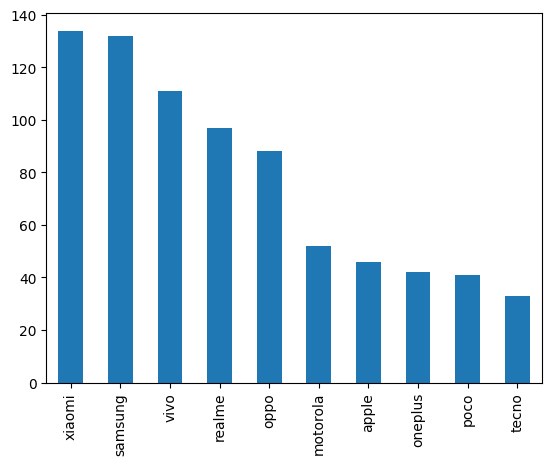

In [8]:
df['brand_name'].value_counts().head(10).plot(kind='bar')

<Axes: ylabel='brand_name'>

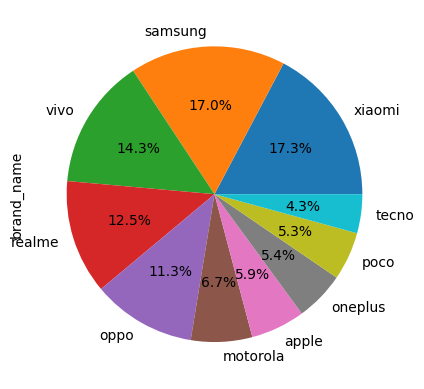

In [9]:
df['brand_name'].value_counts().head(10).plot(kind='pie',autopct='%0.1f%%')

In [10]:
df['brand_name'].isnull().sum()

0

In [11]:
#model
df['model'].nunique()

980

In [12]:
# Price
# the distribution is not normal, it has to be skewd
# there are outliers in data
df['price'].describe()

count       980.000000
mean      32520.504082
std       39531.812669
min        3499.000000
25%       12999.000000
50%       19994.500000
75%       35491.500000
max      650000.000000
Name: price, dtype: float64

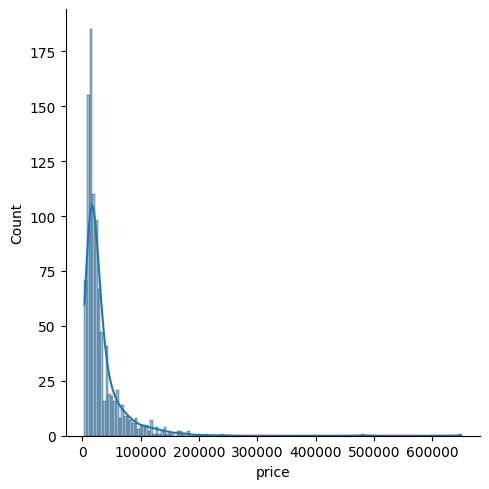

In [13]:
sns.displot(kind='hist',data=df,x='price',kde=True)

In [14]:
df['price'].skew()

6.591790999665567

<Axes: >

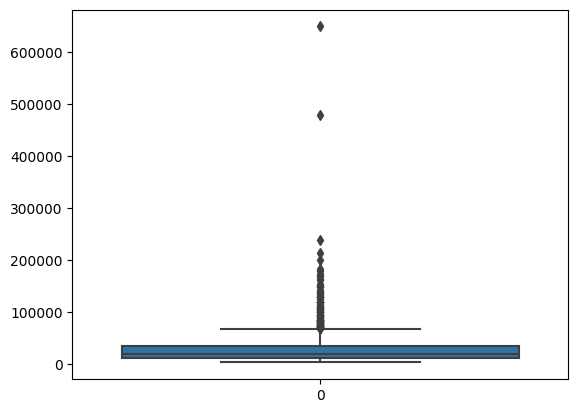

In [15]:
sns.boxplot(df['price'])

In [16]:
df[df['price']>200000]

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,resolution,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
427,vertu,Vertu Signature Touch,650000,62.0,False,True,False,snapdragon,8.0,1.50,2275.0,0,NaN,2.0,64.0,4.70,60,1080 x 1920,1,1.0,android,13.0,2.1,0,NaN
478,huawei,Huawei Mate 50 RS Porsche Design,239999,81.0,False,True,True,snapdragon,8.0,3.20,4700.0,1,66.0,12.0,512.0,6.74,120,1212 x 2616,3,1.0,other,50.0,13.0,1,256.0
887,xiaomi,Xiaomi Redmi K20 Pro Signature Edition,480000,88.0,False,True,False,snapdragon,8.0,2.80,4000.0,1,27.0,8.0,256.0,6.39,60,1080 x 2340,3,1.0,android,48.0,20.0,0,NaN
951,huawei,Huawei Mate 30 RS Porsche Design,214990,NaN,True,True,True,kirin,8.0,2.86,4500.0,1,NaN,12.0,512.0,6.53,60,1176 x 2400,4,2.0,android,40.0,32.0,1,256.0


In [17]:
df['price'].isnull().sum()

0

In [18]:
# rating
df['rating'].describe()

count    879.000000
mean      78.258248
std        7.402854
min       60.000000
25%       74.000000
50%       80.000000
75%       84.000000
max       89.000000
Name: rating, dtype: float64

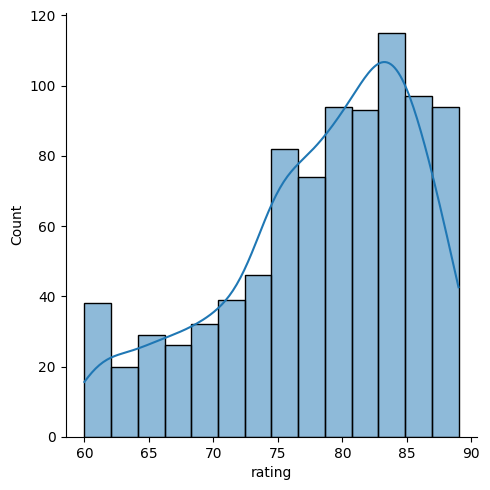

In [19]:
sns.displot(kind='hist',data=df,x='rating',kde=True)

In [20]:
df['rating'].skew()

-0.6989993034105535

<Axes: >

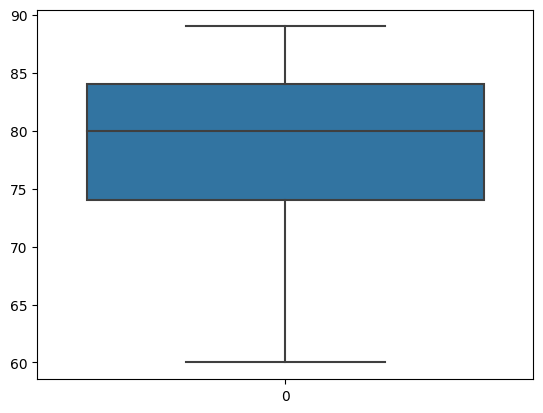

In [21]:
sns.boxplot(df['rating'])

In [22]:
df['rating'].isnull().sum()

101

<Axes: ylabel='has_5g'>

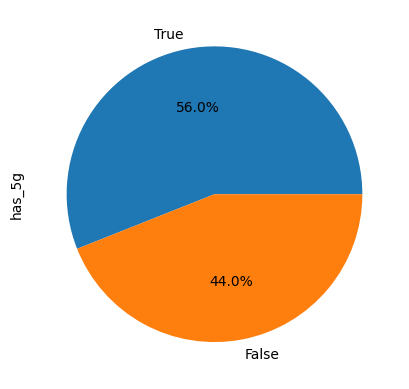

In [23]:
# has_5g
df['has_5g'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<Axes: ylabel='has_nfc'>

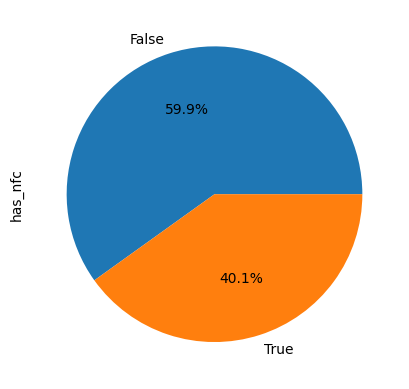

In [24]:
# has_nfc
df['has_nfc'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<Axes: ylabel='has_ir_blaster'>

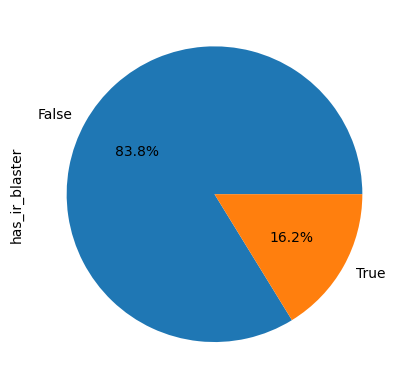

In [25]:
# has_ir_blaster
df['has_ir_blaster'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [26]:
df[df['has_ir_blaster'] ==True]['brand_name'].value_counts()

xiaomi     109
poco        30
iqoo         6
huawei       6
vivo         4
redmi        2
honor        1
samsung      1
Name: brand_name, dtype: int64

<Axes: ylabel='processor_brand'>

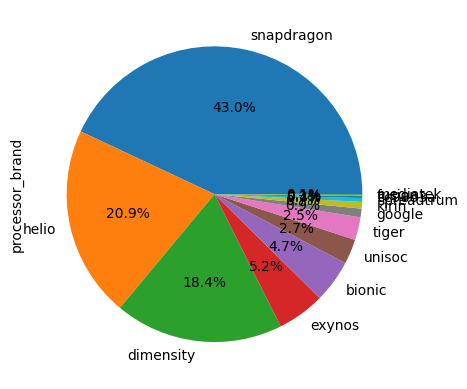

In [27]:
# processor_brand

df['processor_brand'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<Axes: ylabel='num_cores'>

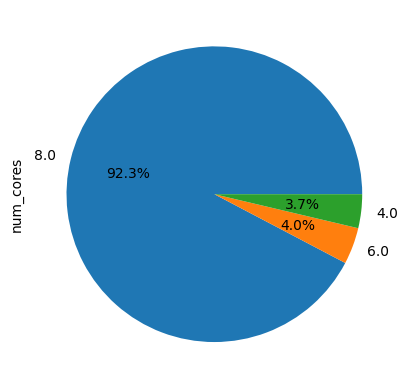

In [28]:
df['num_cores'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<Axes: ylabel='fast_charging_available'>

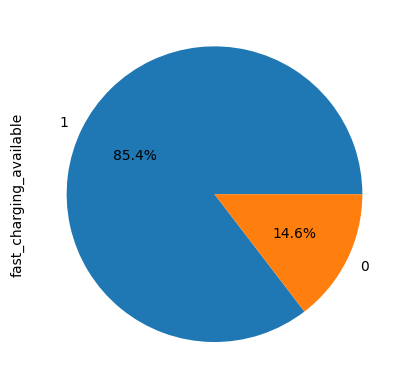

In [29]:
# fast_charging

df['fast_charging_available'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<Axes: ylabel='ram_capacity'>

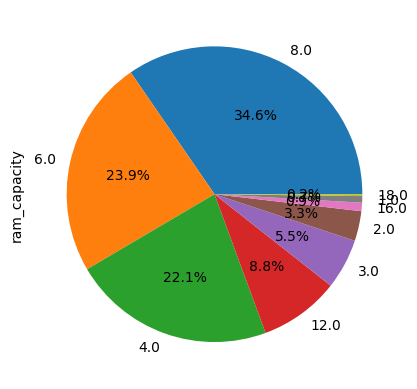

In [30]:
df['ram_capacity'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<Axes: ylabel='internal_memory'>

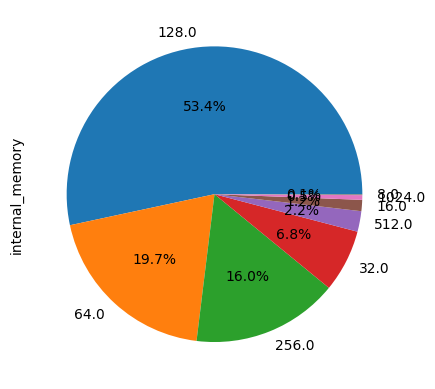

In [31]:
df['internal_memory'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<Axes: ylabel='refresh_rate'>

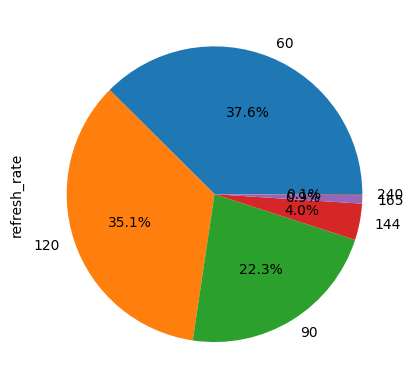

In [32]:
df['refresh_rate'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [33]:
df['refresh_rate'].value_counts()

60     368
120    344
90     219
144     39
165      9
240      1
Name: refresh_rate, dtype: int64

<Axes: >

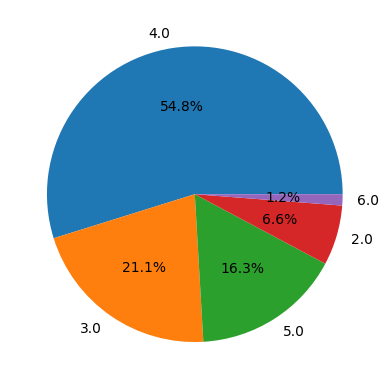

In [34]:
(df['num_rear_cameras'] + df['num_front_cameras']).value_counts().plot(kind='pie',autopct='%0.1f%%')

<Axes: ylabel='os'>

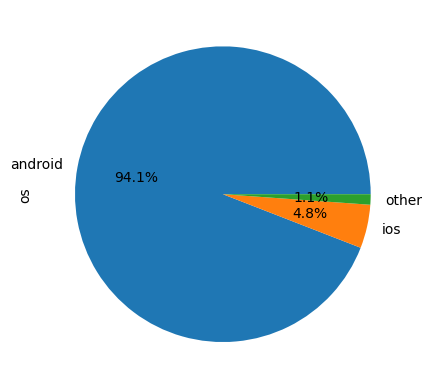

In [35]:
df['os'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<Axes: ylabel='extended_memory_available'>

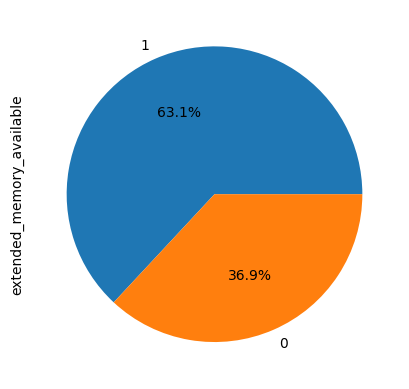

In [36]:
# extended_memory_available
df['extended_memory_available'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<Axes: ylabel='extended_upto'>

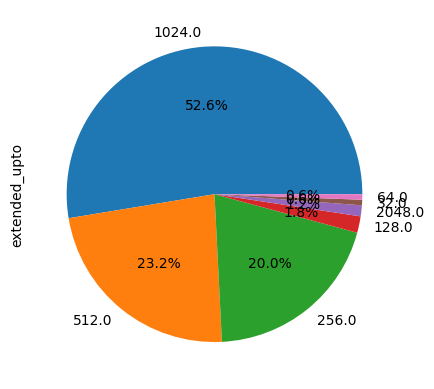

In [37]:
df['extended_upto'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [38]:
def plot_graph(column_names):
  sns.displot(kind='hist',kde=True,data=df,x=column_names,label=column_names)
  sns.catplot(kind='box',data=df,x=column_names)

In [39]:
num_columns=df.select_dtypes(include=['float64','int64']).iloc[:,[3,4,6,9,13,14,16]].columns

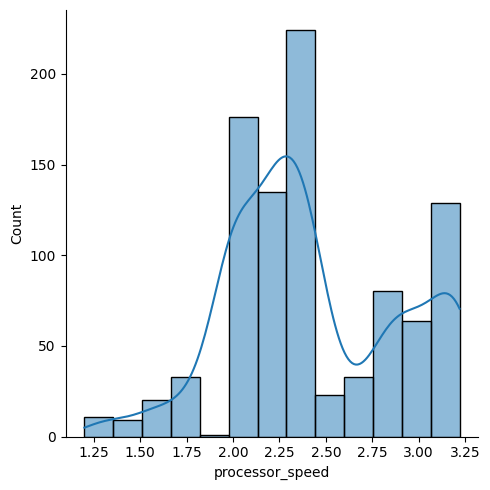

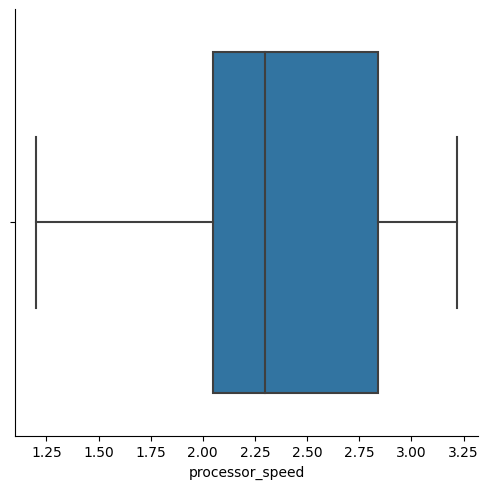

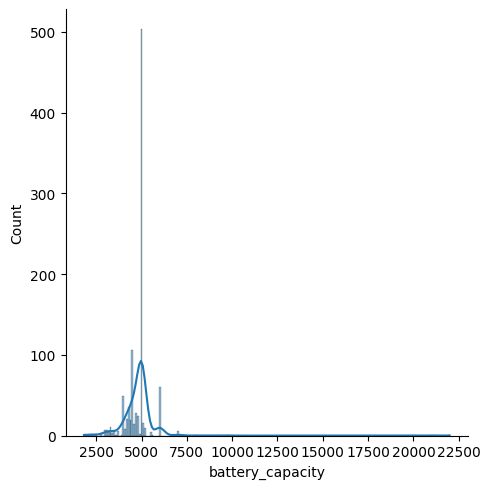

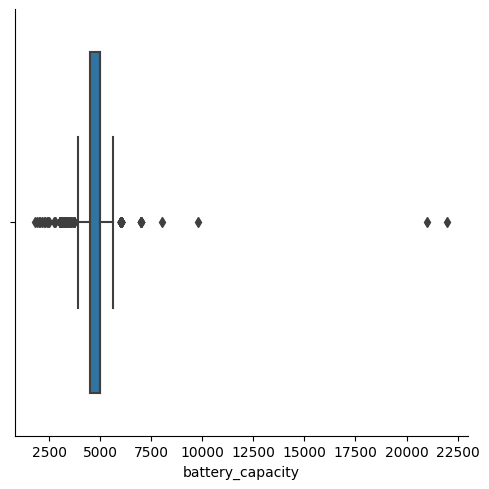

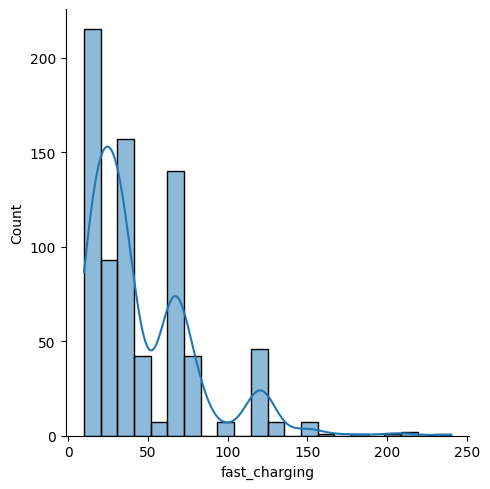

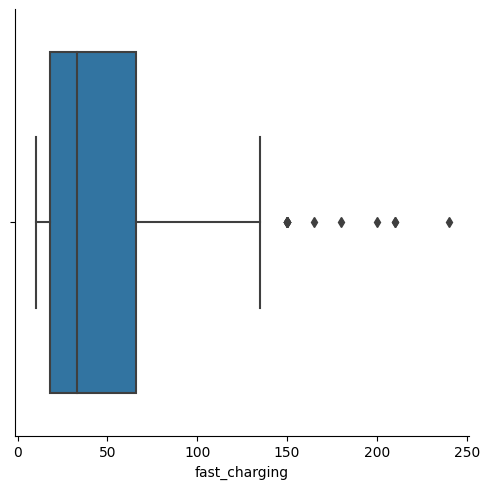

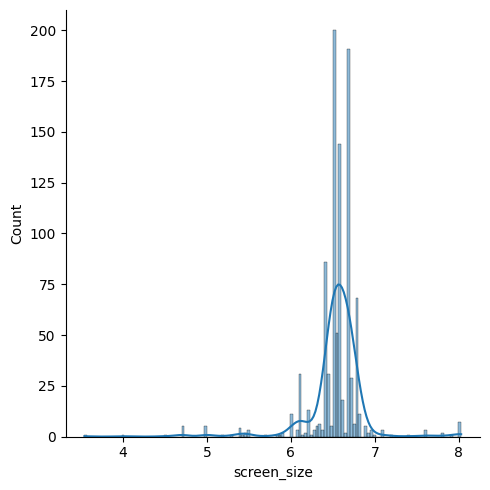

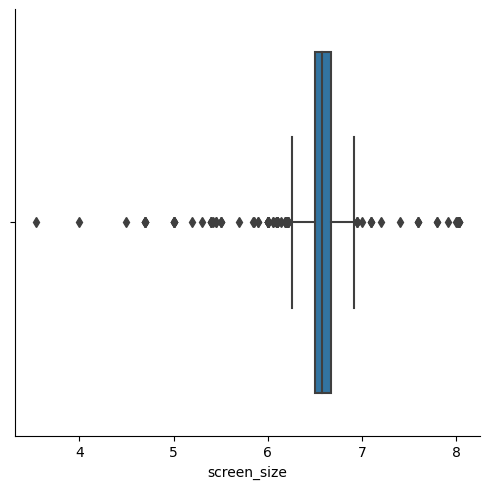

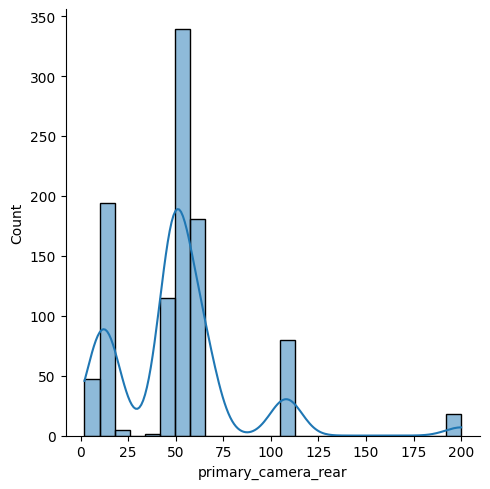

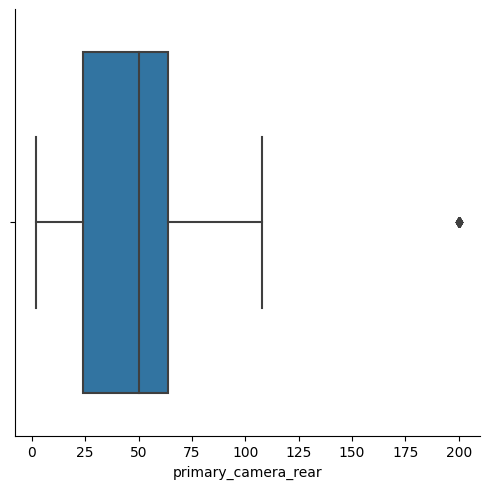

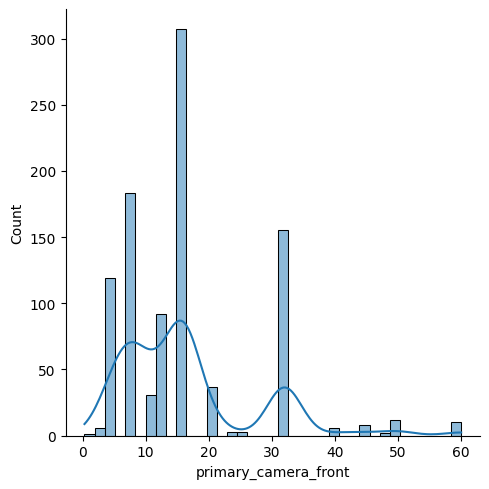

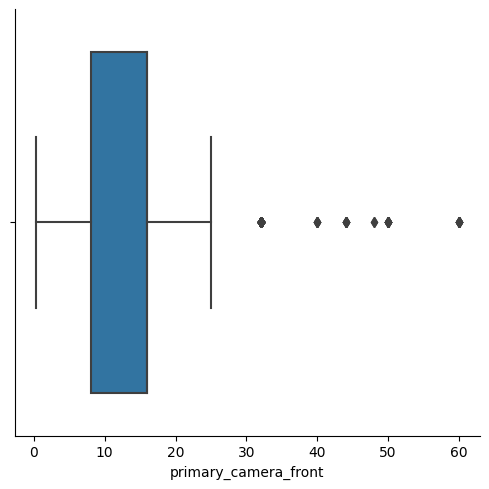

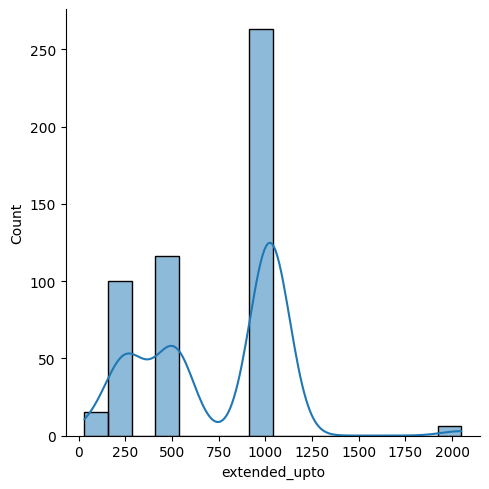

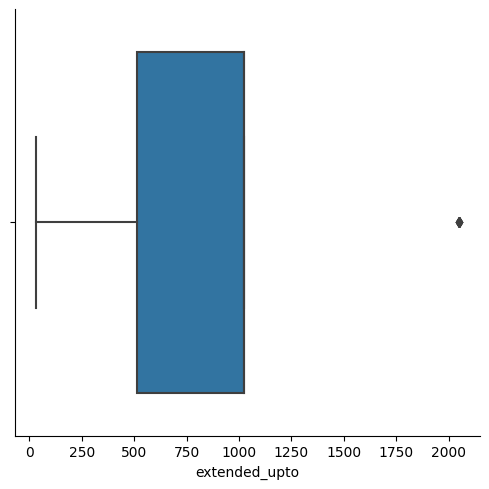

In [40]:
for col in num_columns:
  plot_graph(col)

In [41]:
df.head()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,resolution,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.2,5000.0,1,100.0,12.0,256.0,6.70,120,1440 x 3216,3,1.0,android,50.0,16.0,0,NaN
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.2,5000.0,1,33.0,6.0,128.0,6.59,120,1080 x 2412,3,1.0,android,64.0,16.0,1,1024.0
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.4,5000.0,1,15.0,4.0,64.0,6.60,90,1080 x 2408,3,1.0,android,50.0,13.0,1,1024.0
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.2,5000.0,1,NaN,6.0,128.0,6.55,120,1080 x 2400,3,1.0,android,50.0,16.0,1,1024.0
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.6,5000.0,1,67.0,6.0,128.0,6.70,120,1080 x 2412,3,1.0,android,108.0,16.0,0,NaN


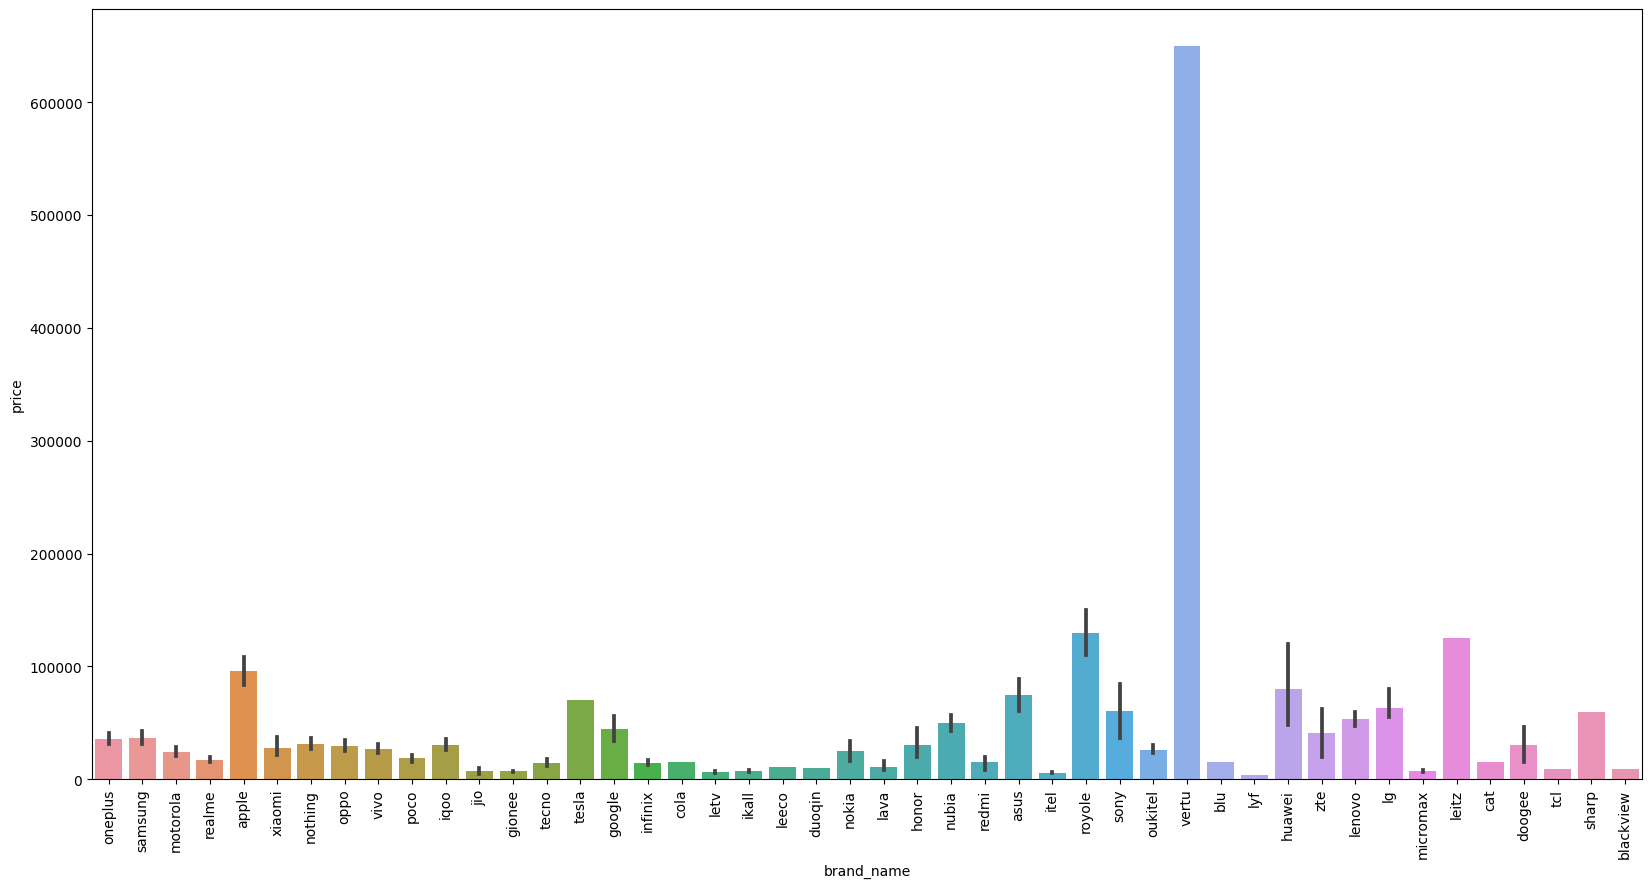

In [42]:
plt.figure(figsize=(20,10))
sns.barplot(data=df,x='brand_name',y='price')
plt.xticks(rotation = 'vertical')
plt.show()

In [45]:
x = df.groupby('brand_name').count()['model']

In [52]:
temp_df = df[df['brand_name'].isin(x[x>10].index)]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'oneplus'),
  Text(1, 0, 'samsung'),
  Text(2, 0, 'motorola'),
  Text(3, 0, 'realme'),
  Text(4, 0, 'apple'),
  Text(5, 0, 'xiaomi'),
  Text(6, 0, 'oppo'),
  Text(7, 0, 'vivo'),
  Text(8, 0, 'poco'),
  Text(9, 0, 'iqoo'),
  Text(10, 0, 'tecno'),
  Text(11, 0, 'google'),
  Text(12, 0, 'infinix'),
  Text(13, 0, 'nokia'),
  Text(14, 0, 'honor'),
  Text(15, 0, 'huawei')])

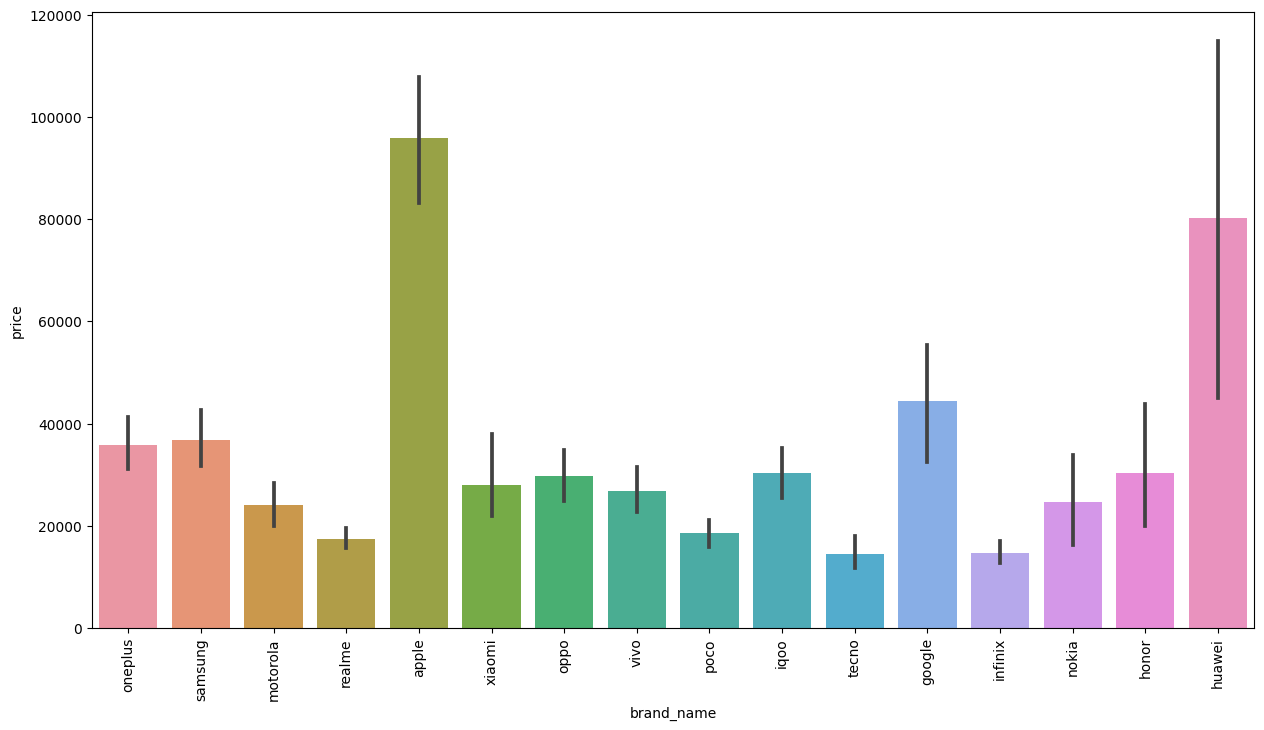

In [53]:
plt.figure(figsize=(15,8))
sns.barplot(data=temp_df,x='brand_name',y='price')
plt.xticks(rotation='vertical')

In [54]:
df.head()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,resolution,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.2,5000.0,1,100.0,12.0,256.0,6.70,120,1440 x 3216,3,1.0,android,50.0,16.0,0,NaN
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.2,5000.0,1,33.0,6.0,128.0,6.59,120,1080 x 2412,3,1.0,android,64.0,16.0,1,1024.0
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.4,5000.0,1,15.0,4.0,64.0,6.60,90,1080 x 2408,3,1.0,android,50.0,13.0,1,1024.0
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.2,5000.0,1,NaN,6.0,128.0,6.55,120,1080 x 2400,3,1.0,android,50.0,16.0,1,1024.0
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.6,5000.0,1,67.0,6.0,128.0,6.70,120,1080 x 2412,3,1.0,android,108.0,16.0,0,NaN


<Axes: xlabel='rating', ylabel='price'>

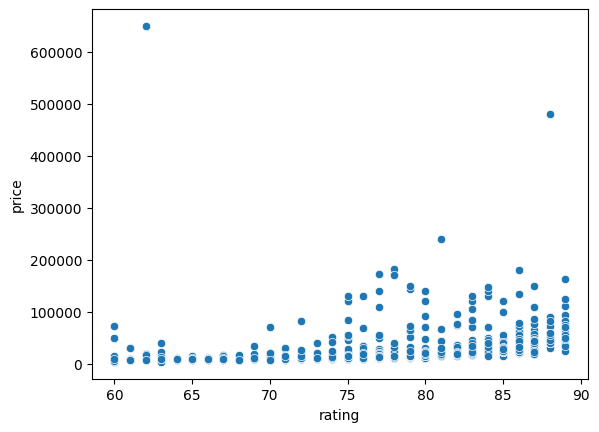

In [55]:
sns.scatterplot(data=df,x='rating',y='price')

<Axes: xlabel='has_5g', ylabel='price'>

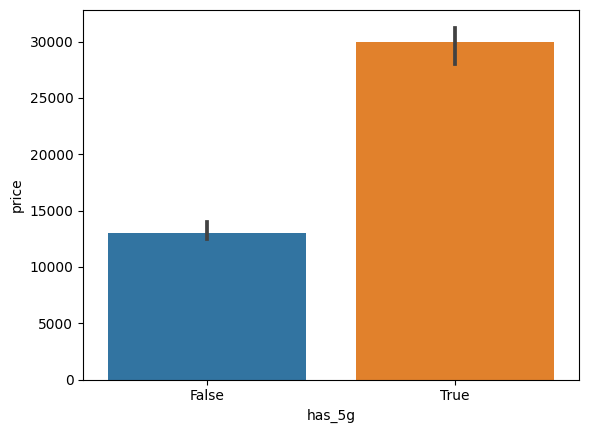

In [56]:
sns.barplot(data=temp_df,x='has_5g',y='price',estimator=np.median)

<Axes: xlabel='has_nfc', ylabel='price'>

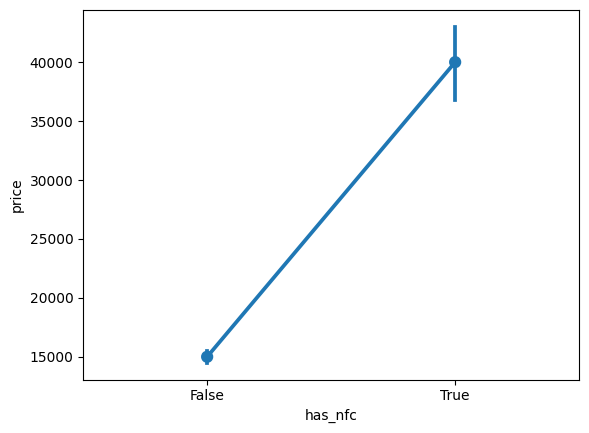

In [57]:
sns.pointplot(data=temp_df,x='has_nfc',y='price',estimator=np.median)

<Axes: xlabel='has_ir_blaster', ylabel='price'>

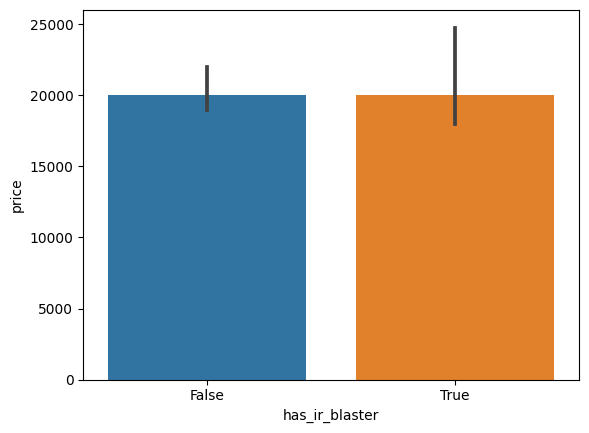

In [58]:
sns.barplot(data=temp_df,x='has_ir_blaster',y='price',estimator=np.median)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'snapdragon'),
  Text(1, 0, 'exynos'),
  Text(2, 0, 'dimensity'),
  Text(3, 0, 'bionic'),
  Text(4, 0, 'helio'),
  Text(5, 0, 'unisoc'),
  Text(6, 0, 'google'),
  Text(7, 0, 'tiger'),
  Text(8, 0, 'sc9863a'),
  Text(9, 0, 'fusion'),
  Text(10, 0, 'kirin'),
  Text(11, 0, 'spreadtrum'),
  Text(12, 0, 'mediatek')])

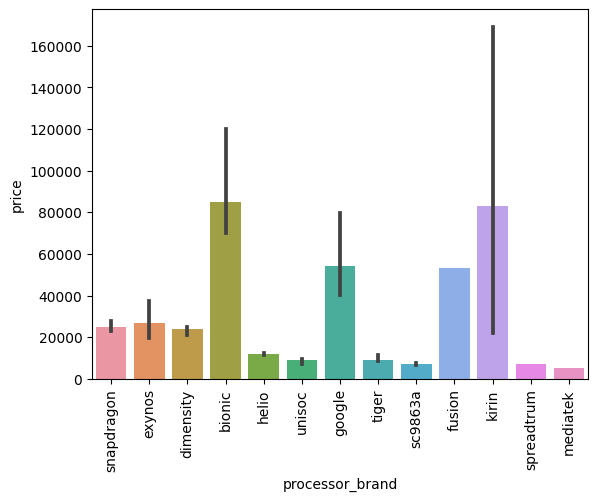

In [59]:
sns.barplot(data=temp_df,x='processor_brand',y='price',estimator=np.median)
plt.xticks(rotation='vertical')

(array([0, 1, 2]), [Text(0, 0, '4.0'), Text(1, 0, '6.0'), Text(2, 0, '8.0')])

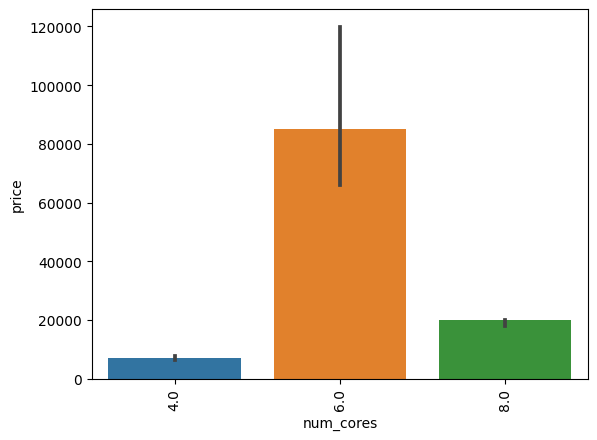

In [60]:
sns.barplot(data=temp_df,x='num_cores',y='price',estimator=np.median)
plt.xticks(rotation='vertical')

In [61]:
pd.crosstab(df['num_cores'],df['os'])

os,android,ios,other
num_cores,,,
4.0,33,1,1
6.0,0,39,0
8.0,875,1,10


<Axes: xlabel='processor_speed', ylabel='price'>

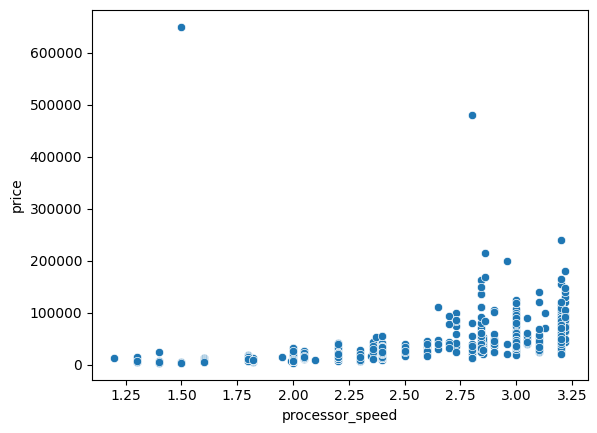

In [62]:
sns.scatterplot(data=df,x='processor_speed',y='price')

<Axes: xlabel='screen_size', ylabel='price'>

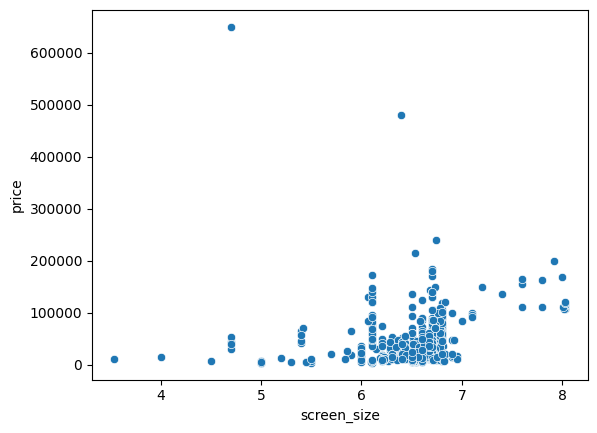

In [63]:
sns.scatterplot(data=df,x='screen_size',y='price')

In [64]:
df.corr()['price']

<ipython-input-64-cbe57b8e6d9c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['price']


price                        1.000000
rating                       0.283504
has_5g                       0.305066
has_nfc                      0.470951
has_ir_blaster              -0.015807
num_cores                   -0.048561
processor_speed              0.474049
battery_capacity            -0.159232
fast_charging_available      0.116739
fast_charging                0.277591
ram_capacity                 0.386002
internal_memory              0.557168
screen_size                  0.113253
refresh_rate                 0.244115
num_rear_cameras             0.125330
num_front_cameras            0.115228
primary_camera_rear          0.092095
primary_camera_front         0.162995
extended_memory_available   -0.448628
extended_upto                0.091945
Name: price, dtype: float64

In [65]:
df.isnull().sum()

brand_name                     0
model                          0
price                          0
rating                       101
has_5g                         0
has_nfc                        0
has_ir_blaster                 0
processor_brand               20
num_cores                      6
processor_speed               42
battery_capacity              11
fast_charging_available        0
fast_charging                211
ram_capacity                   0
internal_memory                0
screen_size                    0
refresh_rate                   0
resolution                     0
num_rear_cameras               0
num_front_cameras              4
os                            14
primary_camera_rear            0
primary_camera_front           5
extended_memory_available      0
extended_upto                480
dtype: int64

In [66]:
df.corr()['rating']

<ipython-input-66-65b2b949a876>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['rating']


price                        0.283504
rating                       1.000000
has_5g                       0.596087
has_nfc                      0.474754
has_ir_blaster               0.156421
num_cores                    0.199741
processor_speed              0.628446
battery_capacity            -0.015581
fast_charging_available      0.542814
fast_charging                0.527613
ram_capacity                 0.757613
internal_memory              0.481070
screen_size                  0.298272
refresh_rate                 0.610795
num_rear_cameras             0.515531
num_front_cameras            0.131480
primary_camera_rear          0.562046
primary_camera_front         0.577861
extended_memory_available   -0.415265
extended_upto                0.346761
Name: rating, dtype: float64

In [67]:
# knn imputer
df.shape

(980, 25)

In [4]:
x_df = df.select_dtypes(include=['int64','float64']).drop(columns='price')

In [5]:
from sklearn.impute import KNNImputer

In [6]:
imputer = KNNImputer(n_neighbors=5)

In [7]:
x_df_values = imputer.fit_transform(x_df)

In [8]:
x_df = pd.DataFrame(x_df_values,columns=x_df.columns)

In [9]:
x_df['price'] = df['price']

In [10]:
x_df.isnull().sum()

rating                       0
num_cores                    0
processor_speed              0
battery_capacity             0
fast_charging_available      0
fast_charging                0
ram_capacity                 0
internal_memory              0
screen_size                  0
refresh_rate                 0
num_rear_cameras             0
num_front_cameras            0
primary_camera_rear          0
primary_camera_front         0
extended_memory_available    0
extended_upto                0
price                        0
dtype: int64

In [74]:
x_df.head()

,rating,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,price
0,89.0,8.0,3.2,5000.0,1.0,100.0,12.0,256.0,6.70,120.0,3.0,1.0,50.0,16.0,0.0,870.4,54999
1,81.0,8.0,2.2,5000.0,1.0,33.0,6.0,128.0,6.59,120.0,3.0,1.0,64.0,16.0,1.0,1024.0,19989
2,75.0,8.0,2.4,5000.0,1.0,15.0,4.0,64.0,6.60,90.0,3.0,1.0,50.0,13.0,1.0,1024.0,16499
3,81.0,8.0,2.2,5000.0,1.0,29.2,6.0,128.0,6.55,120.0,3.0,1.0,50.0,16.0,1.0,1024.0,14999
4,82.0,8.0,2.6,5000.0,1.0,67.0,6.0,128.0,6.70,120.0,3.0,1.0,108.0,16.0,0.0,1024.0,24999


In [75]:
a = x_df.corr()['price'].reset_index()

In [76]:
b = df.corr()['price'].reset_index()

<ipython-input-76-dcd5fd260837>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  b = df.corr()['price'].reset_index()


In [77]:
b.merge(a,on='index')

,index,price_x,price_y
0,price,1.000000,1.000000
1,rating,0.283504,0.341727
2,num_cores,-0.048561,-0.055949
3,processor_speed,0.474049,0.488426
4,battery_capacity,-0.159232,-0.166257
5,fast_charging_available,0.116739,0.116739
6,fast_charging,0.277591,0.220688
7,ram_capacity,0.386002,0.386002
8,internal_memory,0.557168,0.557168
9,screen_size,0.113253,0.113253


In [78]:
pd.get_dummies(df,columns=['brand_name','processor_brand','os'],drop_first=True).corr()['price']

<ipython-input-78-ee138dd85671>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pd.get_dummies(df,columns=['brand_name','processor_brand','os'],drop_first=True).corr()['price']


price                         1.000000
rating                        0.283504
has_5g                        0.305066
has_nfc                       0.470951
has_ir_blaster               -0.015807
num_cores                    -0.048561
processor_speed               0.474049
battery_capacity             -0.159232
fast_charging_available       0.116739
fast_charging                 0.277591
ram_capacity                  0.386002
internal_memory               0.557168
screen_size                   0.113253
refresh_rate                  0.244115
num_rear_cameras              0.125330
num_front_cameras             0.115228
primary_camera_rear           0.092095
primary_camera_front          0.162995
extended_memory_available    -0.448628
extended_upto                 0.091945
brand_name_asus               0.090566
brand_name_blackview         -0.019033
brand_name_blu               -0.014180
brand_name_cat               -0.014173
brand_name_cola              -0.014173
brand_name_doogee        